In [1]:
#importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
import math
import pandas as pd

# Importing and Manipulating Data #

### Due to the limited computational ability of my computer and this program, we are only going to be analyzing the first 100 sequential numbers and prime numbers. For this, we will need to mask the data.

In [2]:
column_names=['Sequential_Rank', 'Prime_Number', 'Interval_from_Previous_Prime'] #column names to be added
full_prime_data=pd.DataFrame(columns=column_names) #creating dataframe by assigning column names

#reading the csv file
prime_data = pd.read_csv("P1000.csv", skiprows=0, delimiter=',', names = column_names)
prime_data.columns = column_names #adding column names to dataframe
prime_data = prime_data.dropna(axis="columns", how="all") #drop empty columns
prime_data = prime_data.dropna() #drop rows with NaNs

In [3]:
prime_data.head()
prime_data.describe()

,Sequential_Rank,Prime_Number,Interval_from_Previous_Prime
count,1000.000000,1000.000000,1000.000000
mean,500.500000,3682.913000,7.919000
std,288.819436,2344.091671,5.726363
min,1.000000,2.000000,1.000000
25%,250.750000,1593.500000,4.000000
50%,500.500000,3576.000000,6.000000
75%,750.250000,5695.000000,10.000000
max,1000.000000,7919.000000,34.000000


In [4]:
#assigning variables to the columns
sequence = prime_data['Sequential_Rank']
primes = prime_data['Prime_Number']
intervals = prime_data['Interval_from_Previous_Prime']

#masking the data to only show the first 100 sequential numbers
mask = sequence <= 100
sequence_data_100 = sequence[mask]

#masking the data to only show the first 100 primes
mask = sequence <= 100
prime_data_100 = primes[mask]

# Plotting the Data #

### We are plotting the overall trendlines of the sequential numbers vs. sequential numbers, and prime numbers vs. sequential numbers.

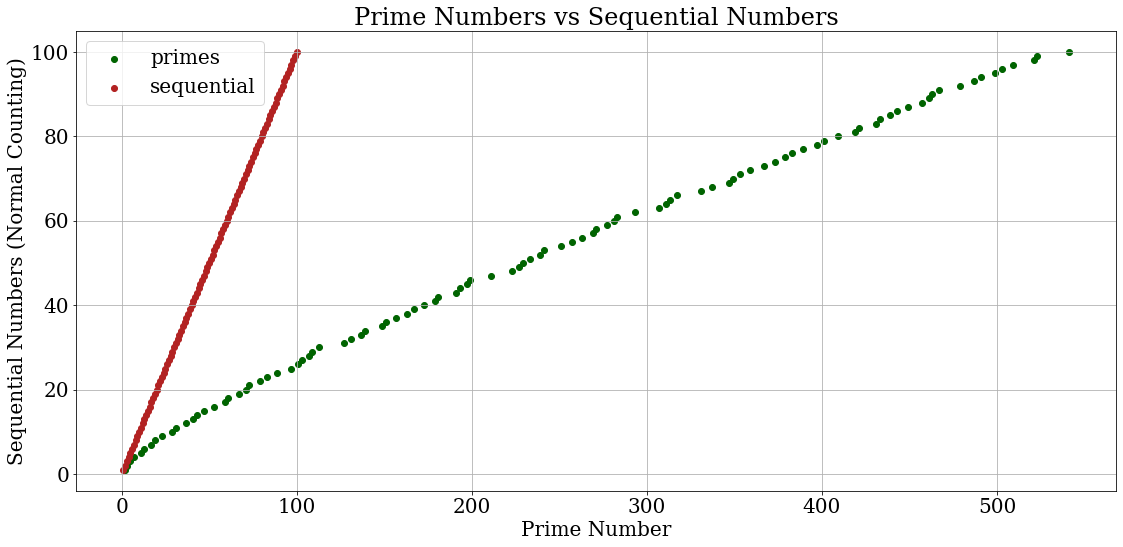

In [5]:
#plotting the data
plt.rcParams.update({'font.size': 20}) #changing the font size
plt.rcParams["font.family"] = "serif" #chaning the font
plt.figure(figsize=(16,8))
plt.scatter(prime_data_100, sequence_data_100, color="darkgreen", label = "primes")
plt.scatter(sequence_data_100,sequence_data_100, color = "firebrick", label = "sequential")
plt.xlabel("Prime Number")
plt.ylabel("Sequential Numbers (Normal Counting)")
plt.title("Prime Numbers vs Sequential Numbers")
plt.legend()
plt.grid()
plt.tight_layout()

# Willan's Formula 

### This formula determines the prime numbers from 1 to an arbitrary integer, n. For this program, n will be no greater than 100. However, a RAM overflow occurs after 7 iterations.

In [6]:
#the function that will define willan's formula
def willans_formula(n):
    willans_output = []
    for i in range(2**n):
        inner_sum = np.sum(
                (np.floor(np.cos((np.pi)*(np.math.factorial(j-1))+1)/(j))**2)
                for j in range(i+1))
        outer_sum = sum(np.floor((n/inner_sum)**(1/n))
                       for i in range(2**n))
        
        output = outer_sum + 1
        willans_output.append(output)
    return willans_output

In [7]:
from IPython.display import Image
Image(url="formula_for_primes.png", width=550, height=500)

In [8]:
def inner_sum(i):
    element_list = []
    for index in range(1,1+i):
        element_list.append(np.floor((np.cos(np.pi*((np.math.factorial(index-1)+1)/index)))**2))
    return np.sum(element_list)

In [9]:
def outer_sum(n):
    element_list = []
    for index in range(1,2**n+1):
        #print(index)
        #print(inner_sum(index))
        element_list.append(np.floor((n/inner_sum(index))**(1/n)))
        #print(element_list)
    return np.sum(element_list)

In [14]:
n = 1
while n <= 6:
    print(1+outer_sum(n))
    n+=1
    

2.0
3.0
5.0
7.0
11.0
13.0


# Simplified Model of Willan's Formula: 

### This formula calculates the amount of prime numbers exist between 1 and an arbitrary integer, n. It is a simplified version of Willan's Formula (1964). This formula can successfully run up to n=100 iterations.

In [11]:
from IPython.display import Image
Image(url="simplified_willans_formula.jpg", width=550, height=500)

In [12]:
#the function that will define the simplified version of willan's formula

def simplified_willans_formula(n):
    k=1
    for k in range(n-1):
        summation = np.sum(
            (np.cos(((np.math.factorial(k)-k)*np.pi)/(2*(k+1)))))
        inner_function = 0.5*((n-1)+summation)
        output = np.floor(inner_function)
                
    return output

In [13]:
#running the function and assigning the values to a blank array
n = 100
    
output = simplified_willans_formula(n)
print("there are " + str(output) + " prime numbers between 1 and " + str(n) )

there are 49.0 prime numbers between 1 and 100
